In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns 
import time
import warnings

In [47]:
 from statsmodels.tsa.stattools import adfuller

In [7]:
from datetime import datetime

In [3]:
temp = pd.read_csv("C:/Users/Arihant/Machine Learning/Projects/Data/archive/GlobalTemperatures.csv", \
                  dtype = {'Data' : str})
global_temp_country = pd.read_csv("C:/Users/Arihant/Machine Learning/Projects/Data/archive/GlobalLandTemperaturesByCountry.csv")

In [4]:
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

In [5]:
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [8]:
global_temp_country_clear['Date'] = global_temp_country_clear["dt"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
global_temp_country_clear = global_temp_country_clear.drop(columns=['dt'])
temp_country = global_temp_country_clear.dropna()
temp_country

,AverageTemperature,AverageTemperatureUncertainty,Country,Date
0,4.384,2.294,Åland,1743-11-01
5,1.530,4.680,Åland,1744-04-01
6,6.702,1.789,Åland,1744-05-01
7,11.609,1.577,Åland,1744-06-01
8,15.342,1.410,Åland,1744-07-01
...,...,...,...,...
577456,21.142,0.495,Zimbabwe,2013-04-01
577457,19.059,1.022,Zimbabwe,2013-05-01
577458,17.613,0.473,Zimbabwe,2013-06-01
577459,17.000,0.453,Zimbabwe,2013-07-01


In [9]:
split_date ='1952-01-01'
temp_beforeIndus = temp_country[temp_country['Date'] < split_date]
temp_AfterIndus = temp_country[temp_country['Date'] >= split_date]

#### Preprocessing

In [10]:
temp['Date'] = temp['dt'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
# drop the old date(back the old day, I still hang on in the street)
temp = temp.drop(columns=['dt'])
temp['year'] = pd.DatetimeIndex(temp['Date']).year
temp['month'] = pd.DatetimeIndex(temp['Date']).month
# ser datetime as index
temp = temp.set_index('Date')


In [11]:
temp.head(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
Date,,,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750,6
1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750,7
1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750,8
1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750,9


In [12]:
print("Types of values in temp : ")
print(temp.dtypes)
print("Shape of values in temp : ")
print(temp.shape)
temp.describe()

Types of values in temp : 
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
year                                           int64
month                                          int64
dtype: object
Shape of values in temp : 
(3192, 10)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000,6.500000
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.799074,3.452593
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000,1.000000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1816.000000,3.750000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1882.500000,6.500000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000,9.250000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000,12.000000


In [13]:
temp_avg = temp.groupby('year').mean()

In [14]:
temp_avg

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month
year,,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN,6.5
...,...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,6.5
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,6.5
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,6.5


Text(0.5, 1.0, 'Yearly land average temperature')

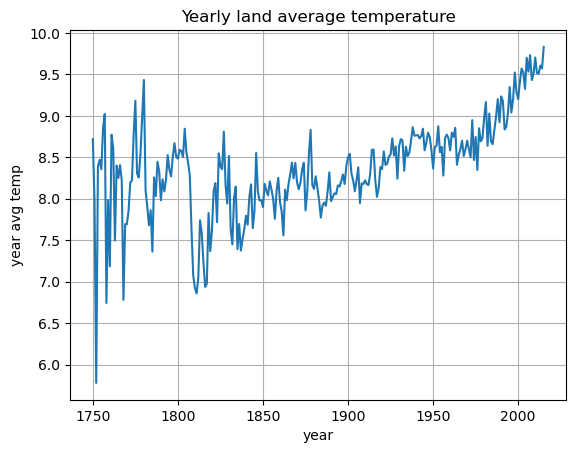

In [15]:
# a general view of year average tempature bewteen 1750 to 2015

ax = temp_avg['LandAverageTemperature'].plot()
plt.grid()
plt.ylabel("year avg temp")
plt.title('Yearly land average temperature')

In [16]:
temp_avg['LandAverageTemperatureUncertainty_max'] = temp_avg['LandAverageTemperature'] + temp_avg['LandAverageTemperatureUncertainty']
temp_avg['LandAverageTemperatureUncertainty_min'] = temp_avg['LandAverageTemperature'] - temp_avg['LandAverageTemperatureUncertainty']

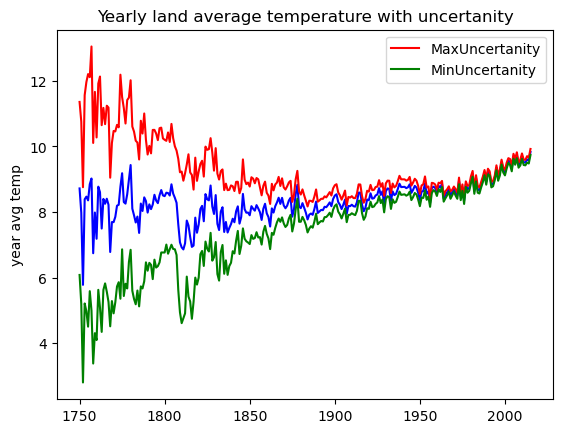

In [17]:
fig, ax = plt.subplots() 
ax.plot(temp_avg['LandAverageTemperature'], color='blue')
ax.plot(temp_avg['LandAverageTemperatureUncertainty_max'], color='red', label = 'MaxUncertanity')
ax.plot(temp_avg['LandAverageTemperatureUncertainty_min'], color='green', label = 'MinUncertanity')
ax.set_ylabel('year avg temp')
ax.set_title('Yearly land average temperature with uncertanity')
ax.legend()

In [18]:
# get the month average temperature

temp_mon_avg = temp.groupby('month').mean()

Text(0.5, 1.0, 'Monthly land average temperature')

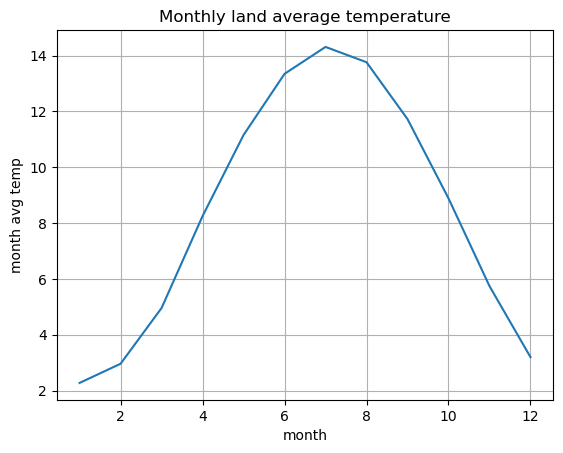

In [19]:
# plot a general view of month average tempature between 1750 to 2015

ax = temp_mon_avg['LandAverageTemperature'].plot()
plt.grid()
plt.ylabel("month avg temp")
plt.title('Monthly land average temperature')

#### Data Decompostion

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

temp_de = temp_avg[['LandAverageTemperature']]

# drop na
temp_de = temp_de.dropna()

#
result = seasonal_decompose(temp_de, model='multiplicative', period = 12)

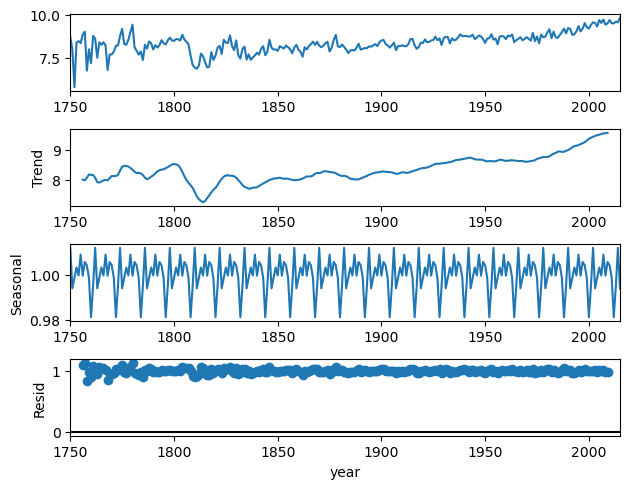

In [21]:
result.plot()
plt.xlabel('year')
plt.show()

In [22]:
temp = temp.dropna()

#### ARIMA

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

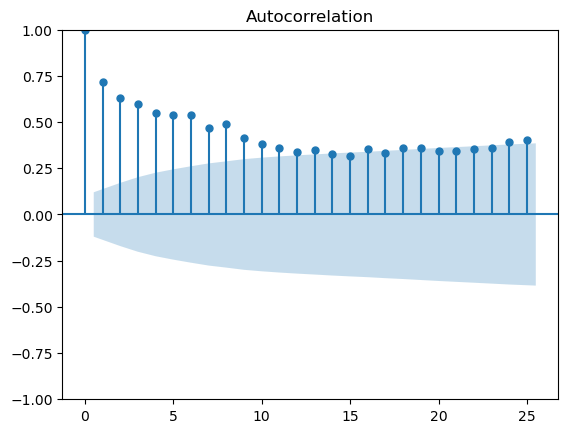

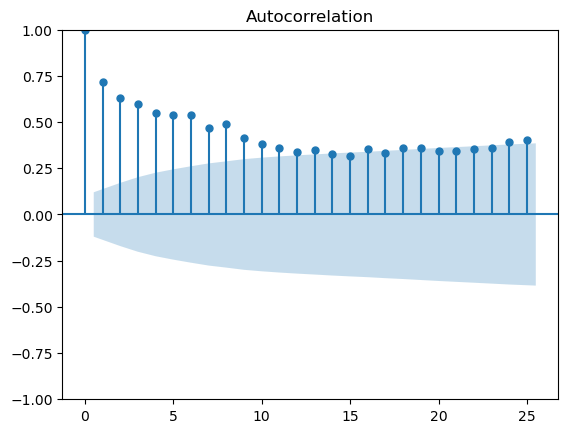

In [24]:
plot_acf(temp_avg[['LandAverageTemperature']])

The acf plot shows the correlation between the same series with a time lag. When we have one lag the correlation factor is 1, two lag is 0.74...... As we can see the correlation slowly decay, so it is not stationary. It should ideally decay immediately to 0 or negative, showing that the data is stationary

In [44]:
Xs = temp_avg["LandAverageTemperature"].values

In [51]:
result = adfuller(Xs)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])    
p = result[1]
if (p <= 0.05):
    print("Time Series is Stationary, since p-value <= 0.05")

Performing Augmented Dickey-Fuller Test to confirm stationarity...
ADF Statistic: -0.191872
p-value: 0.939484


In [25]:
avg_diff = temp['LandAverageTemperature'].diff(periods = 1)

In [26]:
avg_diff = avg_diff[1:]
avg_diff.head()

Date
1850-02-01    2.322
1850-03-01    1.883
1850-04-01    2.263
1850-05-01    2.787
1850-06-01    3.146
Name: LandAverageTemperature, dtype: float64

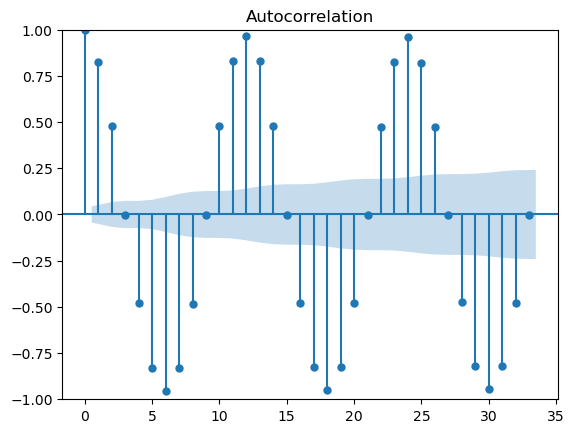

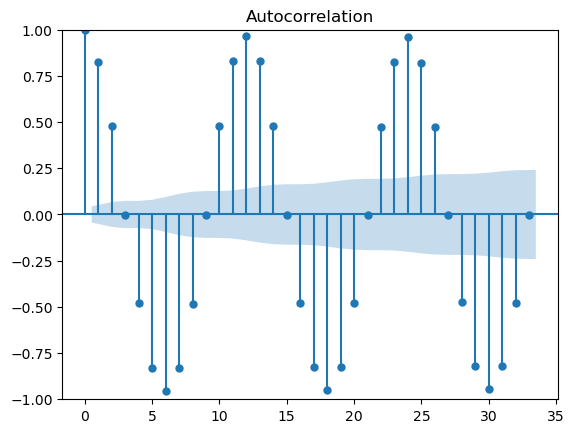

In [27]:
plot_acf(avg_diff)


<Axes: xlabel='Date'>

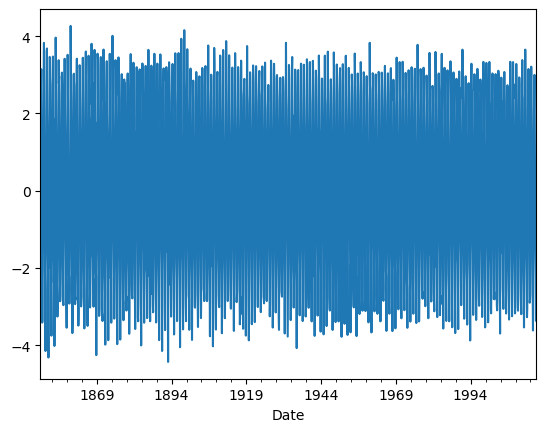

In [28]:
avg_diff.plot()

In [52]:
result = adfuller(avg_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])    
p = result[1]
if (p <= 0.05):
    print("Time Series is Stationary, since p-value <= 0.05")

Performing Augmented Dickey-Fuller Test to confirm stationarity...
ADF Statistic: -12.581647
p-value: 0.000000
Time Series is Stationary, since p-value <= 0.05


In [29]:
#split_date = '2011-01-01'

train_temp = temp[:'2013-1-1']
test_temp = temp['2013-1-1':]
predictions = []

#### ARIMA MODEL

In [31]:
pip install pmdarima


     ---------------------------------------- 0.0/572.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/572.7 kB 640.0 kB/s eta 0:00:01
     --- --------------------------------- 61.4/572.7 kB 648.1 kB/s eta 0:00:01
     ------- ---------------------------- 122.9/572.7 kB 798.9 kB/s eta 0:00:01
     ------- ---------------------------- 122.9/572.7 kB 798.9 kB/s eta 0:00:01
     ---------------- --------------------- 256.0/572.7 kB 1.1 MB/s eta 0:00:01
     ---------------- --------------------- 256.0/572.7 kB 1.1 MB/s eta 0:00:01
     ------------------------- ------------ 389.1/572.7 kB 1.2 MB/s eta 0:00:01
     -------------------------- ----------- 399.4/572.7 kB 1.2 MB/s eta 0:00:01
     ------------------------------------ - 542.7/572.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ - 542.7/572.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 572.7/572.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 

In [32]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train_temp['LandAverageTemperature'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2296.934, Time=3.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8688.103, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6476.547, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7149.441, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8686.104, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2186.378, Time=3.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2190.064, Time=3.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2083.132, Time=3.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5432.880, Time=1.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5249.497, Time=1

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_temp['LandAverageTemperature'],order=(3,1,5))
#fit model
model=model.fit()
#model.summary()

In [35]:
start = len(train_temp) - 1
end = len(train_temp) + len(test_temp) - 2
pred = model.predict(start = start, end = end, type = 'level')
#print(pred)

<Axes: xlabel='Date'>

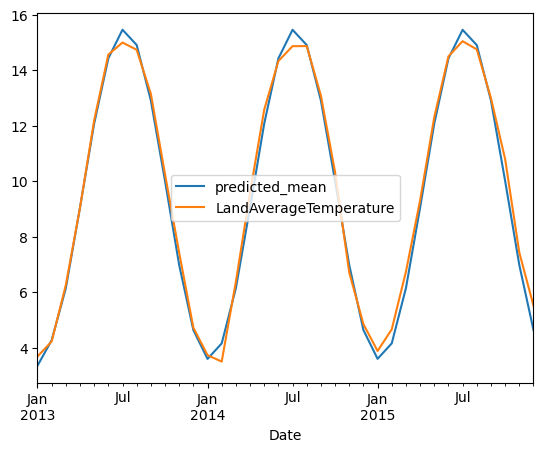

In [36]:
pred.plot(legend=True)
test_temp['LandAverageTemperature'].plot(legend=True)


In [37]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_temp['LandAverageTemperature'], pred)
print(mse)

0.13812805232509576


In [38]:
print(metrics.mean_absolute_error(test_temp['LandAverageTemperature'], pred))

0.30190983744704414


In [39]:
print(np.sqrt(metrics.mean_squared_error(test_temp['LandAverageTemperature'], pred)))

0.3716558250923773


In [40]:
start = len(train_temp)
end = len(train_temp) + len(test_temp) + 10
pred = model.predict(start = start, end = end, type = 'level')

<Axes: xlabel='Date'>

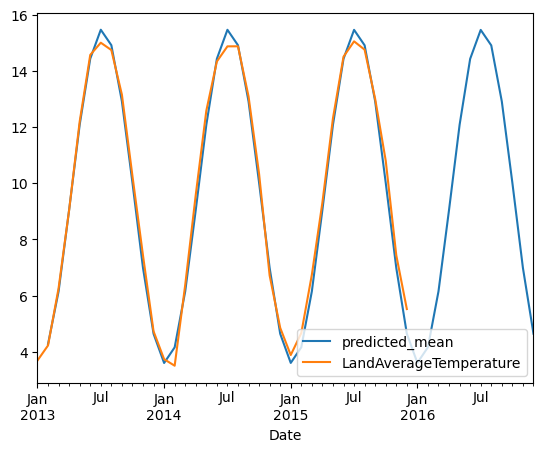

In [41]:
pred.plot(legend=True)
test_temp['LandAverageTemperature'].plot(legend=True)

In [53]:
start = len(train_temp) - 1
end = len(train_temp) + len(test_temp) + 48
pred = model.predict(start = start, end = end, type = 'level')